# Local to global N input modelling

Tormey Reimer [](https://orcid.org/0000-0002-5983-2798)Richard S. Cottrell [](https://orcid.org/0000-0002-6499-7503)Alexandra Johne [](https://orcid.org/0000-0002-2816-7983)Sowdamini Sesha PrasadMarceau CormeryGage ClawsonScott HadleyHelen HamiltonBenjamin S. HalpernCatriona MacleodCamille WhiteJulia L. Blanchard

In [ ]:
library(magrittr)
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'tidyr'

The following object is masked from 'package:magrittr':

    extract

here() starts at C:/Users/treimer/Documents/R-temp-files/local_to_global_mariculture_modelling

qs 0.27.3. Announcement: https://github.com/qsbase/qs/issues/103


Attaching package: 'arrow'

The following object is masked from 'package:magrittr':

    is_in

The following object is masked from 'package:utils':

    timestamp

Linking to GEOS 3.13.0, GDAL 3.10.1, PROJ 9.5.1; sf_use_s2() is TRUE

terra 1.8.42


Attaching package: 'terra'

The following object is masked from 'package:arrow':

    buffer

The following object is masked from 'package:patchwork':

    area

The following object is masked from 'package:ggpubr':

    rotate

The following object is masked from 'package:tidyr':

    extract

The following objects are masked from 'package:magrittr':

    extract, inset


Attaching package: 'rnaturalearthdata'

The following object is masked from 'package:rnaturalearth':

    countries110

Loading required package: future


Attaching package: 'purrr'

The following object is masked from 'package:magrittr':

    set_names

udunits database from C:/Users/treimer/AppData/Local/R/cache/R/renv/cache/v5/windows/R-4.4/x86_64-w64-mingw32/units/0.8-7/5d0b024902d5da97a2b64f002e92a869/units/share/udunits/udunits2.xml

In [ ]:
source(here("00_model_functions.R"))

# Introduction

<span class="column-margin margin-aside">This is a note create with the `aside` class.</span>

Aquaculture is now the dominant form of aquatic animal food (herein ‘seafood’) production and is expected to be the primary way we meet future seafood demand. Freshwater systems will likely continue to provide the majority of farmed seafood but marine aquaculture is also poised to expand substantially in numerous areas. Farmed marine fish and invertebrates are produced near exclusively in coastal waters, and nearly three quarters of this production is dependent on human-made feeds. Nearshore locations and feed inputs are necessary to maintain profitable and productive farming operations but coastal aquaculture generates a number of challenges. In the crowded coastal zone, aquaculture operations can conflict with other stakeholder uses such as recreation, fishing, renewable energy, transport, and tourism. And while farming marine fish typically generates a far smaller nutrient footprint than livestock farming, the overt nature of aquaculture in nearshore regions and evidence of localised nutrient impacts around fish farms remains a primary public and scientific concern. Identifying strategies that reduce ecosystem impacts from fish farm waste therefore represents an important goal for improving marine aquaculture sustainability and maintaining the sector’s social licence to operate.

Aquaculture feeds represent an important lever for reducing nutrient waste impacts around fish farms. Like all farmed animals, fish and invertebrates must digest the nutrients contained in feeds before they can be used for growth. Any nutrients left undigested are egested as solid waste, and dissolved wastes are excreted as metabolic waste products. Further, some feed inevitably remains uneaten and is lost to the surrounding ecosystem. Particulate organic matter (both feed and faeces) that settles can simplify benthic communities as the oxygen demand from its decomposition drives the production of sulphides that kill less mobile faunal, encouraging a lower diversity of opportunistic scavengers and the growth of bacterial mats (e.g., Beggiatoa spp). Thus, the chemical composition of the ingredients used in aquaculture feeds and their digestibility for the farmed species has significant implications for the nature and reactivity of the waste generate by marine aquaculture.

Firstly the overall volume of nutrient waste is dictated by the nature and intensity of production, that is the farm size, the density of farmed animals and the feed requirements and efficiency of the species grown. SecondlDeposition of waste is heavily influenced by water depth and current speed at the farming site. Once

As farmed fish and invertebrates are fed, whatever

Nutand its impact on marine ecosystems is influenced by many factors. \* Farm size \* Depth \* Current speed \* Benthic impact - sediment type/faunal assemblages/wider marine community \* High turnover environments - nitrogen enriched areas \* Feed influences all of these things

The primary source of organic waste from fed aquaculture production comes from the excretion and faeces of the farmed animals and through uneaten feed that dissolves in the water column or settles on the benthos. The nature and impact of this waste are influenced heavily by the composition of the feeds fed to farmed animals.

## P2

-   Waste from aquaculture farms and it’s impact is influenced by many things but the composition of feeds plays a central role.
-   Waste from aquaculture farms has multiple sources.
-   The primary source of organic waste comes from the faeces and excretion of the fish or invertebrates.
-   Uneaten feed produced another key source.
-   The nature and impact of this waste are influenced heavily by the composition of the feeds fed to farmed animals
-   Many marine fish are naturally carnivorous so diets used to be high in fishmeal and oil but increasing fishmeal and oil prices along with concerns over the sustainability of marine ingredients have led to a reduction in their use across multiple farmed taxa
-   In lieu of fishmeal and oil, many plant-based ingredients such as soy protein concentrate, canola oil, and wheat gluten have replaced them.
-   Changes in feed composition influences the digestibility of the nutrients held in each feed and can alter the composition of waste.
-   Of particular concern are changes (increases) to the presence of reactive nitrogen and phosphorus in coastal waters that could have an effect on eutrophication.

## P3

-   Whether or not nutrients lead to eutrophication depends on the sensitivity of the receiving environment
-   Ecosystems that are already enriched through natural processes and whose biota is well adapted to substantial fluxes in available nutrients (e.g. upwelling zones, dynamic coastal communities) may be less sensitive while oligotrophic ecosystem are likely to see considerable changes under nutrient enrichment scenarios.
-   To understand the impact of aquaculture waste under present day or future scenarios we need to quantify the volume, nature, and location of mariculture waste and determine the sensitivity of the receiving environments to that waste. Yet only recent estimates even give us the estimated location of marine farms let alone the volume of nature of the waste produced. To address this gap, we use existing maps of mariculture location with a bioenergtic model

# Methods

## Farm temperature forcings

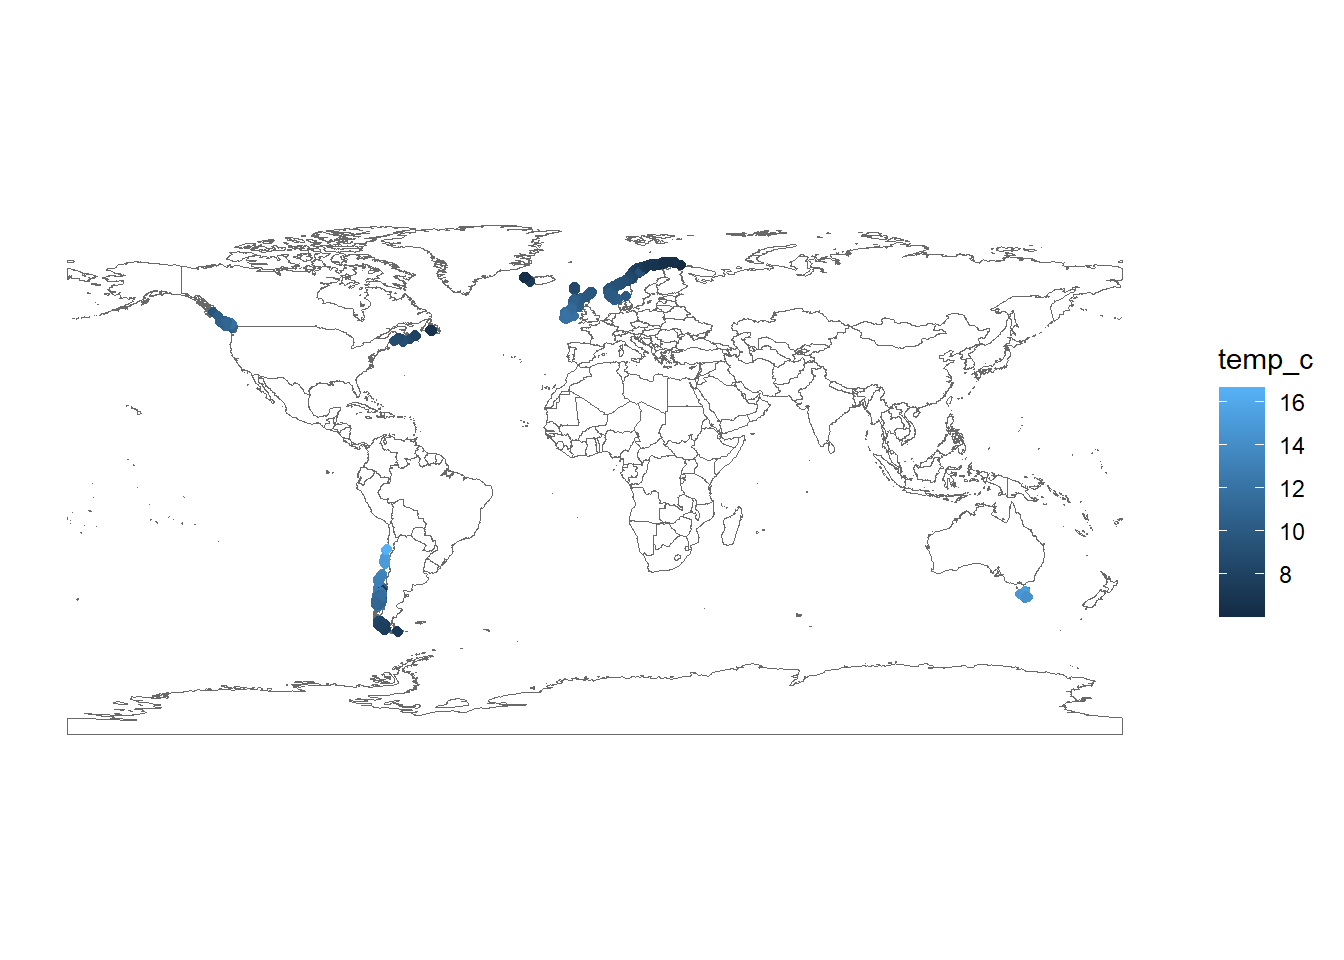

In [ ]:
worldmap <- ne_countries(scale = "medium", returnclass = "sf")
farms_to_omit <- here() %>% 
  file.path("data", "_general_data", "farm_locations", "atlantic_salmon_farms_to_omit.qs") %>% 
  qread()

farms_w_temp_df <- here() %>% 
  file.path("data", "_general_data", "farm_locations", "atlantic_salmon_locations_w_temps.qs") %>% 
  qread() %>% 
  filter(!farm_id %in% farms_to_omit) %>% 
  mutate(country = as.factor(country),
         species_group = as.factor(species_group),
         data_type = as.factor(data_type),
         data_type_2 = as.factor(data_type_2),
         model_name = as.factor(model_name),
         F_CODE = as.factor(F_CODE),
         day = str_split_i(day, "_", 2) %>% as.integer())

farm_temp_means <- farms_w_temp_df %>% 
  select(iso3c, country, farm_id, temp_c)
farm_temp_means_1 <- farms_w_temp_df %>% 
  filter(day == 1) %>% 
  select(geometry)

farm_temp_means <- farm_temp_means %>% 
  group_by(iso3c, country, farm_id) %>% 
  reframe(temp_c = meanna(temp_c))

farm_temp_means <- cbind(farm_temp_means, farm_temp_means_1)

ggplot(data = worldmap, aes(geometry = geometry)) +
  geom_sf(fill = "white", color = "dimgray") +
  geom_sf(data = farm_temp_means, aes(colour = temp_c), size = 1.5) +
  coord_sf() +
  theme_classic() 

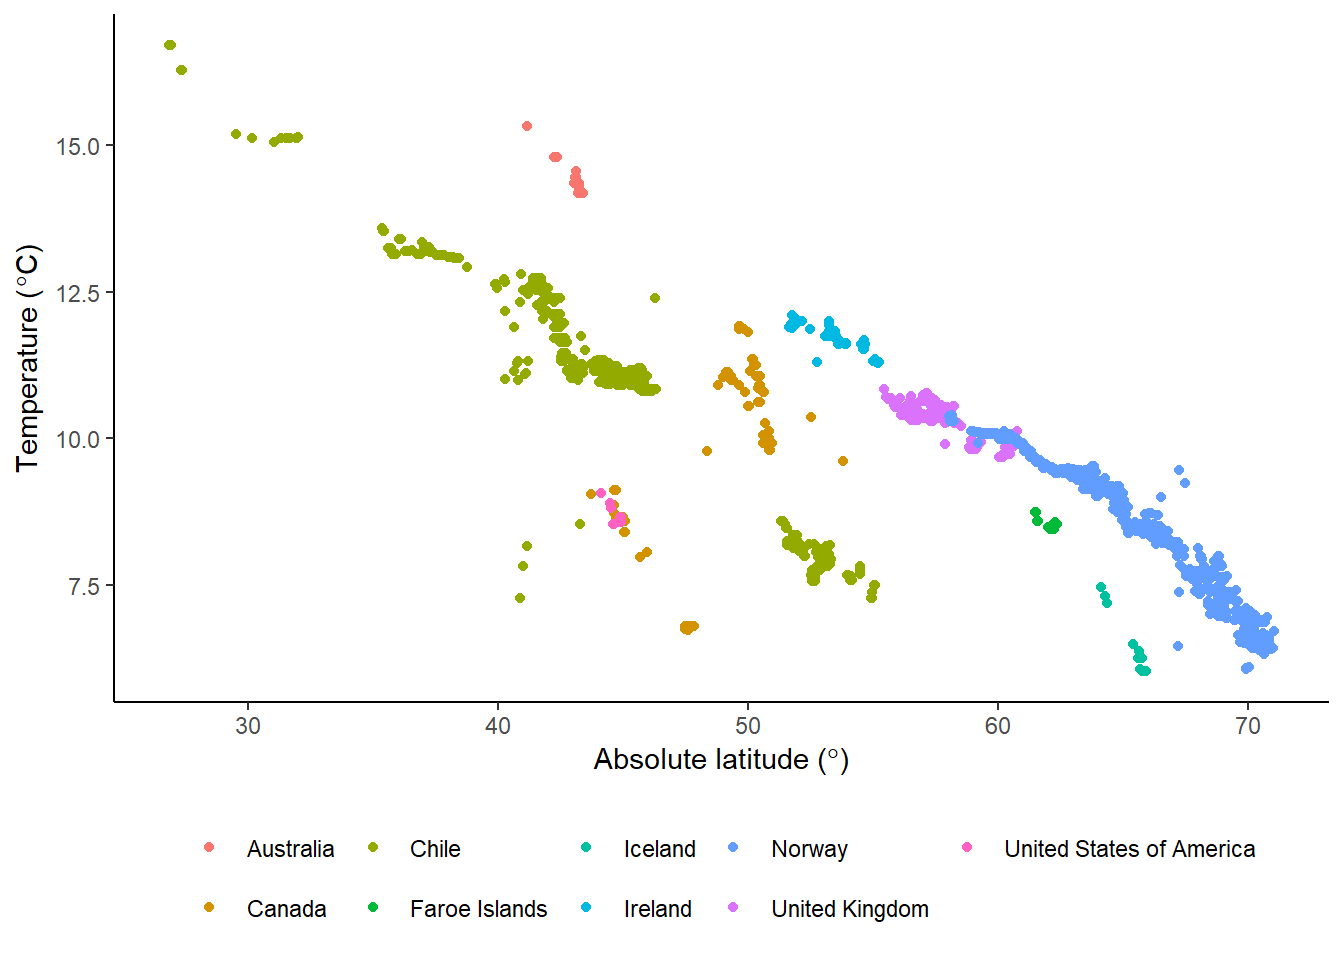

In [ ]:
farm_temp_means %>%
  mutate(
    coords = st_coordinates(geometry),
    longitude = coords[,1],
    latitude = coords[,2]
  ) %>%
  select(-coords) %>% 
  ggplot(aes(y = temp_c, x = abs(latitude), colour = country)) +
  geom_point() +
  labs(x = expression("Absolute latitude ("*degree*")"), y = expression("Temperature ("*degree*"C)")) +
  theme_classic() +
  theme(legend.position = "bottom", legend.title = element_blank())

## Model and approach

We adapted the methods of @baldan_r_2018 to create a bioenergetic model that simulates individual growth and farm-scale production for Atlantic salmon and the resultant nutrient waste in the form of excess labile nitrogen and phosphorus. The model simulates growth at an individual level, calculating the change in individual weight through time using:

$$
\frac{dw}{dt} = \frac{A-C}{\epsilon}
$$

Where $w=$ is wet weight (t), $t=$ time (d), $A=$ anabolic rate (J t$^{-1}$), $C=$ the catabolic rate (J t$^{-1}$), $\epsilon=$ energy density of body tissues (J t$^{-1}$). Individual models were then upscaled using monte-carlo simulations to simulate size structure in a population. Size differences were achieved through different initial starting weights and ingestion rates for different finfish species. All individuals have a fixed mortality rate to simulate stocking and harvesting.

-   Farms with a mean temperature of $\leq 6^\circ$C were excluded.

In [ ]:
farms_to_omit <- here() %>% file.path("data/_general_data/farm_locations/atlantic_salmon_farms_to_omit.qs") %>% 
  qread()

<span class="column-margin margin-aside">Need to put the cohort concept (and harvest timing) in here.</span>

787.7115 [t]

101.4564 [t]

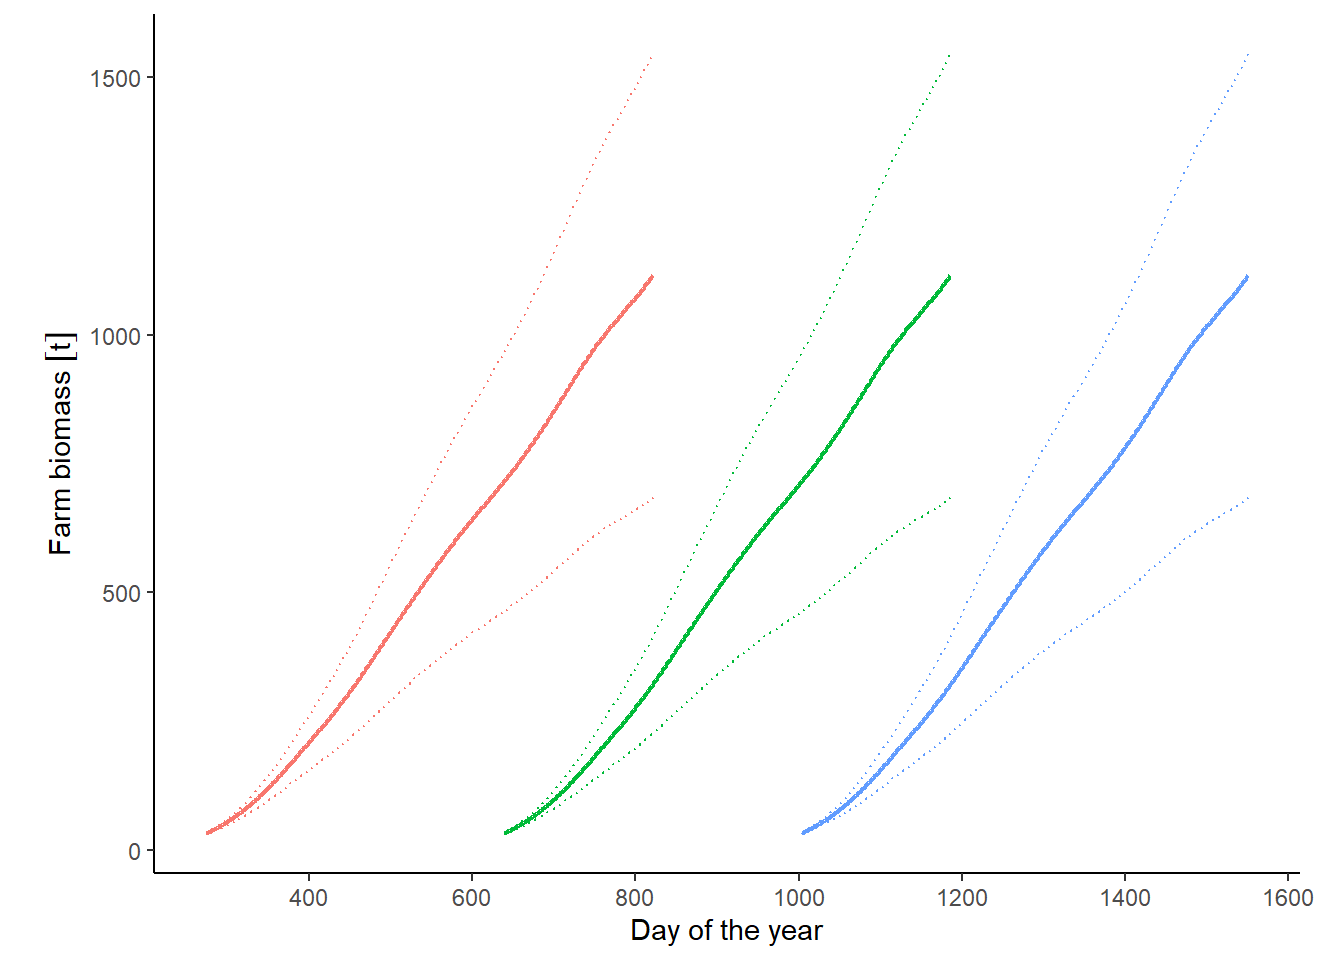

In [ ]:
fnms <- coho_outputs %>% 
  list.files(full.names = T) %>% 
  str_subset("biomass")

df <- fnms[1] %>% read_parquet() %>% 
  filter(feed == "reference") %>% 
  mutate(mean = set_units(mean, "g") %>% set_units("t"),
         sd = set_units(sd, "g") %>% set_units("t"))

ggplot(df, aes(x = yday, y = mean, ymin = mean-sd, ymax = mean+sd, colour = as.factor(cohort))) +
  geom_line(linewidth = 0.75) +
  geom_ribbon(linetype = "dotted", alpha = 0) +
  scale_x_continuous(breaks = seq(0, 2000, 200)) +
  labs(y = "Farm biomass", x = "Day of the year") +
  theme_classic() +
  theme(legend.position = "none", aspect.ratio = 0.75)

yrs <- max(df$yday)/365
harvests <- df %>% 
  group_by(cohort) %>% 
  reframe(mean = maxna(mean),
          sd = maxna(sd))

sum(harvests$mean)/yrs

### Feeding rate

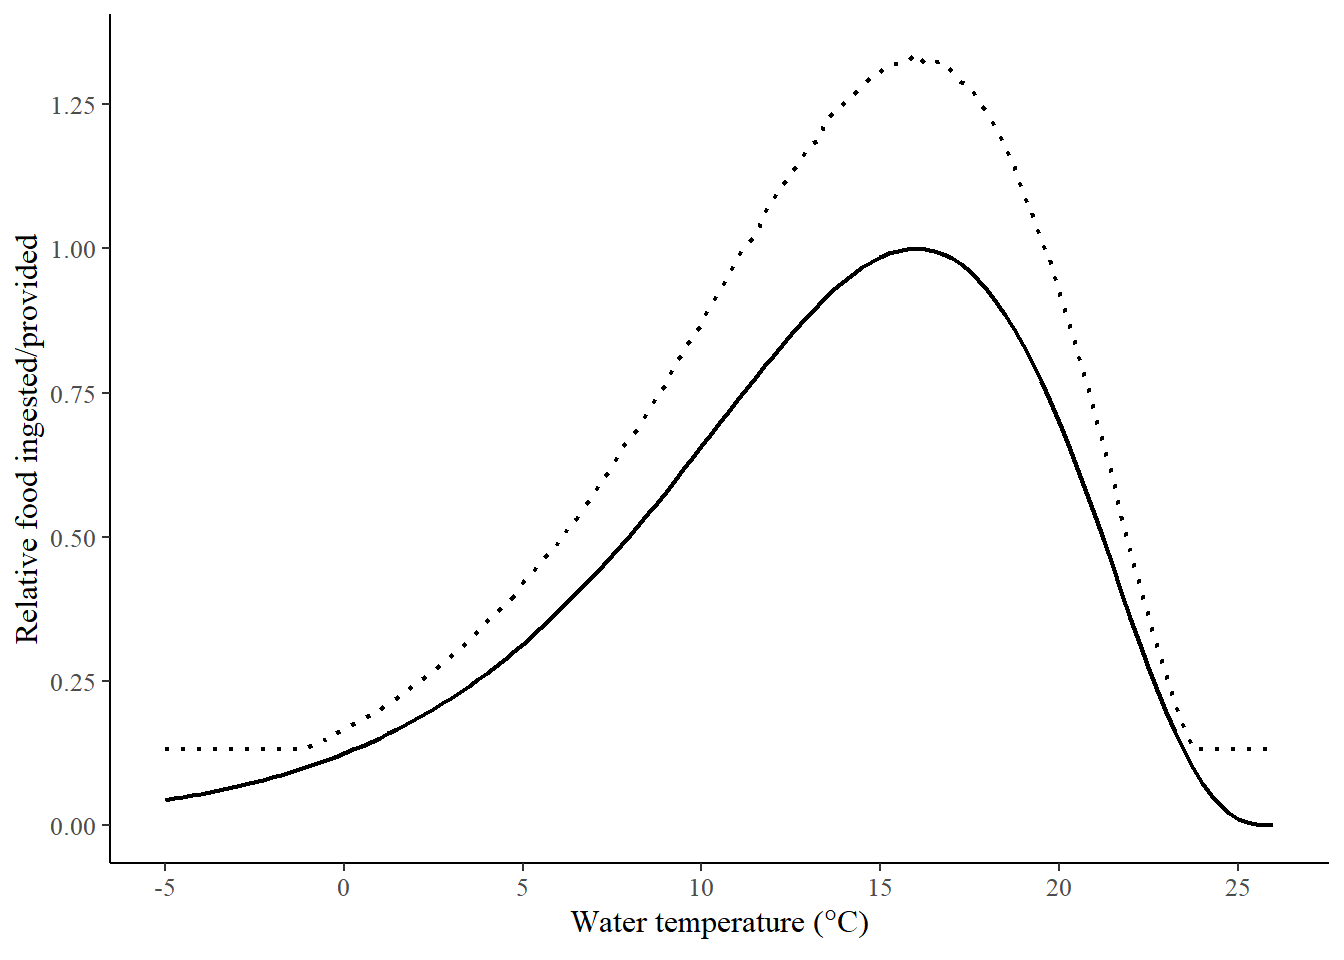

In [ ]:
df <- data.frame(water_temp = seq(-5, 26, 0.25))
df$feeding <- sapply(FUN = feeding_rate, X = df$water_temp, species_params = species_params)
df <- df %>% 
mutate(ing_pot = pop_params['meanImax'] * (pop_params['meanW']^species_params['m']) * feeding,
       food_prov = NA)
for (i in 1:nrow(df)) {
  df$food_prov[i] <- food_prov_rate(pop_params = pop_params, rel_feeding = df$feeding[i], ing_pot = df$ing_pot[i], 
                                    ing_pot_10 = pop_params['meanImax'] * (pop_params['meanW']^species_params['m']) * 0.1)
}
df$ing_pot <- df$ing_pot/maxna(df$ing_pot)
df$food_prov <- df$food_prov/maxna(df$ing_pot)

df %>% 
  ggplot(aes(x = water_temp, y = ing_pot)) +
  geom_line(linewidth = 0.75) +
  geom_line(aes(y = food_prov), linewidth = 0.75, linetype = "dotted") +
  scale_y_continuous(breaks = seq(0,1.5,0.25)) +
  scale_x_continuous(breaks = seq(-5,30,5), limits = c(-5,26)) +
  labs(x = expression("Water temperature ("*degree*"C)"), y = "Relative food ingested/provided") +
  theme_classic() +
  theme(text = element_text(colour = "black", family = "serif", size = 12))

## Parameterisation for Atlantic salmon

In [ ]:
params <- c(pop_params, species_params)
pnames <- names(params)
sens_excr <- here() %>% file.path("data", "atlantic_salmon", "data_products", "excreted_parameter_sensitivity.parquet") %>%
  read_parquet() %>%
  mutate(adj_param = factor(adj_param, levels = rev(adj_param)))

Table @tbl-params shows the parameter values used to model the growth of farmed Atlantic salmon.

| Parameter | Value | Units | Description | Reference |
|:--:|:--:|:--:|:---|:---|
| $\alpha$ | 0.04 | \- | Feeding catabolism coefficient | *Salvelinus alpinus*, *Oncorhynchus mykiss* (temps: 8–13$^{\circ}$C) \[@broekhuizen_modelling_1994\] |
| $\epsilon_{P}$ | 2.36^{4} | J g protein$^{-1}$ | Energy content of protein | @baldan_r_2018 |
| $\epsilon_{L}$ | 3.62^{4} | J g lipid$^{-1}$ | Energy content of lipid | @baldan_r_2018 |
| $\epsilon_{C}$ | 1.72^{4} | J g carbohydrate$^{-1}$ | Energy content of carbohydrate | @baldan_r_2018 |
| $\epsilon_{O_2}$ | 1.34^{4} | J g O2$^{-1}$ | Energy consumed by the respiration of 1 g of oxygen | @elliott_energy_1975 |
| $pk$ | 0.05 | d$^{-1}$ | Temperature coefficient for the fasting catabolism | @macnaughton_using_2019 |
| $k_0$ | 0.003 | \- | Fasting catabolism at 0 $^{^\circ}$C | @macnaughton_using_2019 |
| $m$ | 0.75 | \- | Weight exponent for anabolism | Experimentally-derived alue over a range of *Oncorhynchus*, *Perca* and *Salmo* species (temps: 8–13$^{\circ}$C) \[@broekhuizen_modelling_1994\] |
| $n$ | 1 | \- | Weight exponent for catabolism | @baldan_r_2018 |
| $\beta C$ | 0.3234 | \- | Shape coefficient for the feeding function | Fish size range: 2.25 $\pm$ 0.49 – 11.5 $\pm$ 5.29 g, temperature ranges: 5–24$\^{\circ}$C. Coefficent for mean daily energy intake of the moderately fast growing group, 0.4398 (mean fast group), 0.2214 (mean slow group) \[@jonsson_thermal_2001\] |
| $T_{max}$ | 26 | $^{^\circ}$C | Maximum lethal temperature | Juvenile *Oncorhynchus tshawytscha* (19.8 $\pm$ 0.02 g, acclimation temp: 15$^{^\circ}$C, 19${\circ}$C) \[@poletto_unusual_2017\] |
| $T_{opt}$ | 16 | $^{^\circ}$C | Optimal temperature | Fish size range: 2.25 $\pm$ 0.49 – 11.5 $\pm$ 5.29 g, temperature ranges: 5–24$^{^\circ}$C \[@jonsson_thermal_2001\]. Alt value: 14°C \[@handeland_effect_2008\], *Salmo salar* initial size: 77.0 $\pm$ 14.6 g, temps: 6, 10, 14, 18${\circ}$C |
| $T_{min}$ | 2 | $^{^\circ}$C | Lowest feeding temperature | Fish essentially stop feeding when below 2$^{\circ}$C \[@vadboncoeur_lowering_2023\] |
| $\omega$ | 0.6542 | g O2 / g | Oxygen consumption:weight loss ratio | Calibrated value from @baldan_r_2018 |
| $a$ | 2669 | J g tissue$^{-1}$ | Energy content of fish tissue | Alt value: 17.02350 (nls model fitted to female Atlantic salmon data extracted and transformed from @jonsson_energy_2003 \[@van_tien_development_2016\] |
| $k$ | 0.1715 | \- | Weight exponent for energy content | Alt value: 1.65175 (nls model fitted to female Atlantic salmon data extracted and transformed from @jonsson_energy_2003 \[@van_tien_development_2016\] |
| $eff$ | 0.97 | \- | Food ingestion efficiency | Range: 95-97% ingestion efficiency \[@uglem_does_2020\] |
| $\overline{W}$ | 125 | g | Dry weight mean | Range of 100-150 given so used a mean of 125 and sd of 10 which over 1000 draws from a normal distribution delivers a minimum and maximum close to these numbers \[@dempsey_estimating_2023\] |
| $\Delta{W}$ | 10 | g | Dry weight standard deviation | Range of 100-150 given so used a mean of 125 and sd of 10 which over 1000 draws from a normal distribution delivers a minimum and maximum close to these numbers \[@dempsey_estimating_2023\] |
| $\overline{I_{max}}$ | 0.035 | g g$^{-1}$ fish day$^{-1}$ | Ingestion rate mean | [FAO](https://www.fao.org/fileadmin/user_upload/affris/docs/tabl10.pdf) |
| $\Delta{I_{max}}$ | 0.005 | g g$^{-1}$ fish day$^{-1}$ | Ingestion rate standard deviation | [FAO](https://www.fao.org/fileadmin/user_upload/affris/docs/tabl10.pdf) |
| $mort$ | 5.99798^{-4} | d$^{-1}$ | Natural mortality rate | @tvete_towards_2023 |

Looking at @fig-param-sens-weight:

-   The most sensitive parameter by far is $m$ the weight exponent for anabolism, followed closely by $n$ the weight exponent for catabolism
-   These two are also relatively uncertain, as $m$ was taken from *Salmo trutta* measurements in a fairly old paper \[@broekhuizen_modelling_1994\] and $n$ was taken from @baldan_r_2018 which did not specifically look at Atlantic salmon. There must be more up-to-date measurements for Atlantic salmon in particular.

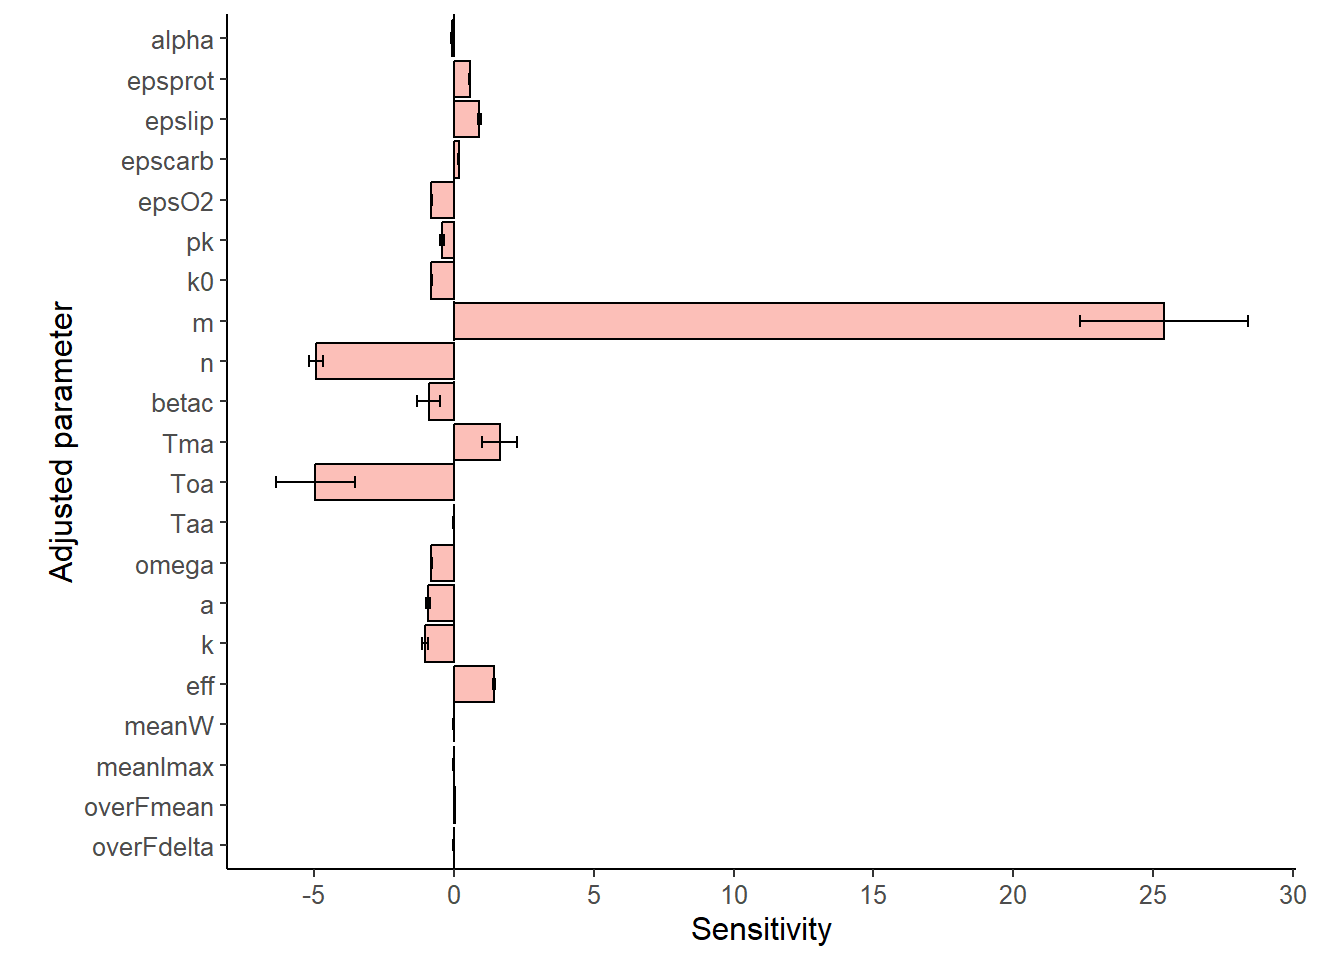

In [ ]:
sens_excr %>% 
  ggplot(aes(x = adj_param, y = sens, ymin = sens-sd, ymax = sens+sd)) +
  geom_col(colour = "black", fill = "salmon", alpha = 0.5) +
  geom_errorbar(width = 0.3) +
  geom_hline(aes(yintercept = 0), linetype = "dashed") +
  scale_y_continuous(breaks = seq(-20,30,5)) +
  labs(x = "Adjusted parameter", y = "Sensitivity") +
  theme_classic() + theme(legend.position = "none", 
        strip.text = element_blank(), 
        aspect.ratio = 0.8,
        text = element_text(size = 12)) +
  coord_flip()

## Population and biomass estimates

New method is to take the average predicted individual harvest size for each farm, then working backwards with the standard mortality rate to generate a population for each farm that will produce the correct tonnage for each farm. @fig-harvest-size shows the average individual harvest size at each farm as predicted by the fish-growth model, which was used to create the population inputs for the farm-level growth curves.

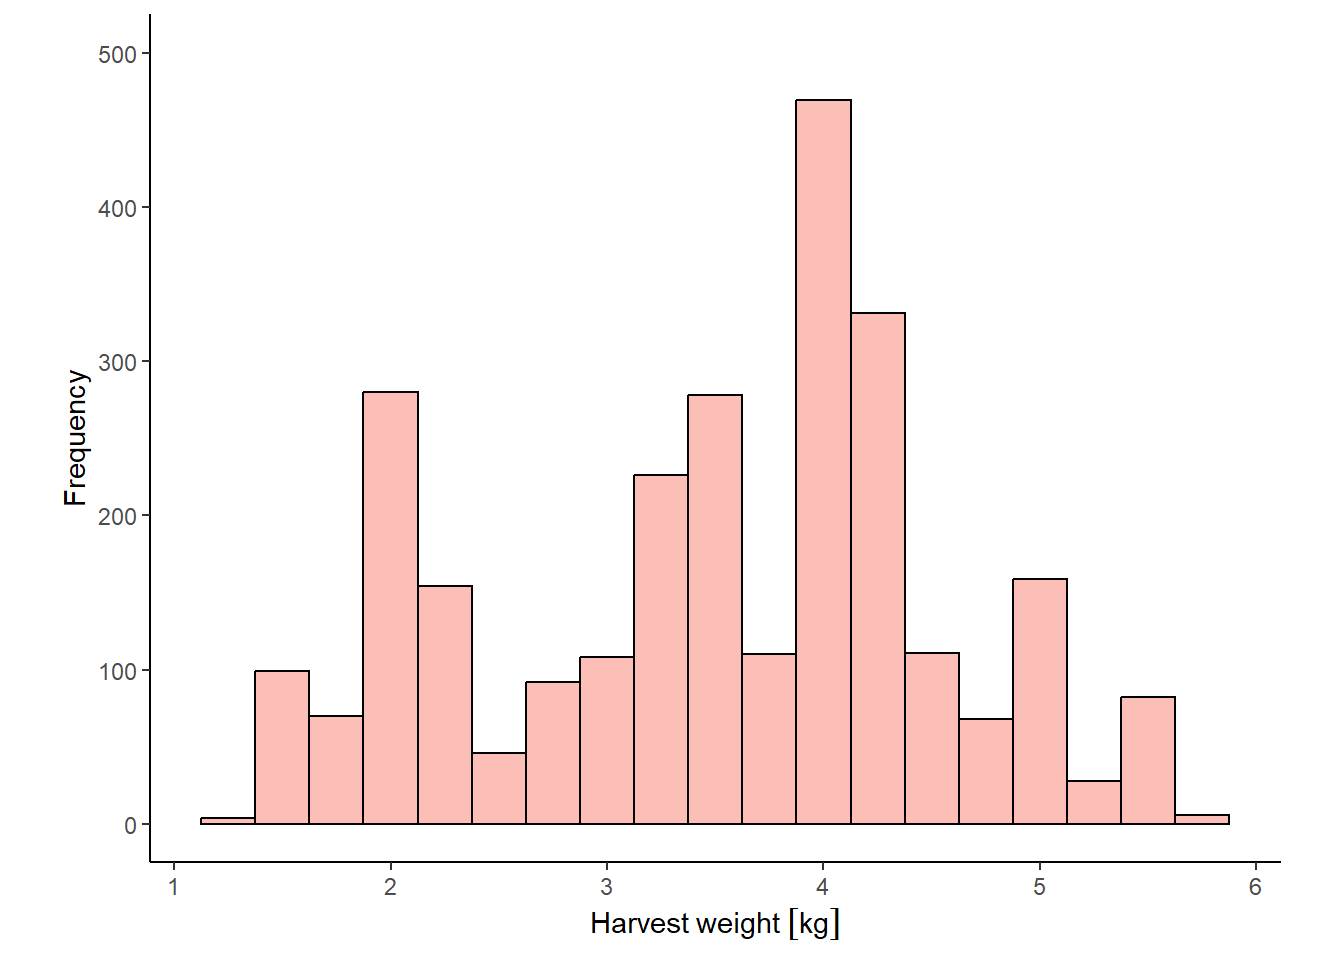

In [ ]:
pdata <- here() %>% file.path("data", "atlantic_salmon", "data_products", "harvest_size.parquet") %>% read_parquet()
pdata %>% 
  mutate(weight = weight %>% set_units("g") %>% set_units("kg")) %>% 
  select(c(farm_ID, weight)) %>% 
  ggplot(aes(x = weight)) +
  geom_histogram(binwidth = 0.25, colour = "black", fill = "salmon", alpha = 0.5) +
  scale_y_continuous(limits = c(0,500)) +
  labs(y = "Frequency", x = "Harvest weight") +
  theme_classic() +
  theme(legend.position = "none", aspect.ratio = 0.75)

This means that the population estimates aren’t actual fish numbers, they’re just a method that allows each farm location to approximate of the correct tonnage produced while to allowing comparisons between the different feeds.

## Species vulnerability layers

# Results

-   Main point is the difference between feeds.
-   This should be expressed in t/t salmon, so farm biomass is also important.
-   Also interesting to see if difference between feeds varies geographically (correlates with mean/median/max temperature?)

# Biomass produced

In [ ]:
fnms <- farm_outputs %>% 
  list.files(full.names = T) %>% 
  str_subset("biomass")

dfs <- list()
for (fid in seq_along(fnms)) {
  dfs[[fid]] <- fnms[fid] %>% 
    read_parquet() %>% 
    filter(days == max(days)) %>% 
    mutate(mean = mean %>% set_units("g") %>% set_units("t"),
           sd = sd %>% set_units("g") %>% set_units("t"))
}
df <- bind_rows(dfs)
df_mean <- df %>% 
  select(-c(days, sd)) %>% 
  pivot_wider(names_from = feed, values_from = mean) %>% 
  mutate(future_diff = (future - reference)/reference,
         past_diff = (past - reference)/reference) %>% 
  select(-c(reference, past, future)) %>% 
  pivot_longer(names_to = "feed", values_to = "mean", cols = c(future_diff, past_diff))
df_sd <- df %>% 
  select(-c(days, mean)) %>% 
  pivot_wider(names_from = feed, values_from = sd) %>% 
  mutate(future_diff = (future - reference)/reference,
         past_diff = (past - reference)/reference) %>% 
  select(-c(reference, past, future)) %>% 
  pivot_longer(names_to = "feed", values_to = "sd", cols = c(future_diff, past_diff))
df <- merge(df_mean, df_sd, by = c("farm_ID", "feed"))

# Locations

# Statistical analysis & code availability

All analysis was conducted in R version 4.2 “Pile of Leaves” \[@R_base\]. For a full list of R packages used see the lockfile on [Github](https://www.github.com). This manuscript was written in Quarto \[@quarto\] using TinyTex \[@tinytex\] and the acronyms extension \[@acronyms\].

# References